# Import libraries

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
import scipy.stats
from sklearn.preprocessing import StandardScaler
#dataframe display settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import and prepare data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df["Overweight"]= (df['bmi']>25)
df["Normal"]= (df['bmi']>18)&(df['bmi']<25)
df["Underweight"]= (df['bmi']<18)



In [5]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges,Overweight,Normal,Underweight
0,19,female,27.90,0,yes,southwest,16884.9240,True,False,False
1,18,male,33.77,1,no,southeast,1725.5523,True,False,False
2,28,male,33.00,3,no,southeast,4449.4620,True,False,False


In [34]:
data0 = df.copy()

In [35]:
target = df['charges']
data0 = df.drop(['charges'],axis = 1)

In [23]:
df.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
Overweight     0
Normal         0
Underweight    0
dtype: int64

## Encode data

In [36]:
data = data0.copy()

In [38]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [37]:
data = pd.get_dummies(data)
data

,age,bmi,children,Overweight,Normal,Underweight,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,0,0,1,1,0,0,1,0,0
4,32,28.880,0,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,0,1,0,1,0,0,0,0,1


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
labelencoder_X = LabelEncoder()
data.Overweight = labelencoder_X.fit_transform(data.Overweight)

In [15]:
labelencoder_X = LabelEncoder()
data.Normal = labelencoder_X.fit_transform(data.Normal)

In [16]:
labelencoder_X = LabelEncoder()
data.Underweight = labelencoder_X.fit_transform(data.Underweight)

In [17]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [-1])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

In [39]:
data = pd.get_dummies(data)
data

,age,bmi,children,Overweight,Normal,Underweight,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,0,0,1,1,0,0,1,0,0
4,32,28.880,0,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,0,1,0,1,0,0,0,0,1


# Feature transformations

In [40]:
data1 = data.copy()

In [41]:
skew_df = pd.DataFrame(data1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data1[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,age,0.055610,0.055610,False
1,bmi,0.283729,0.283729,False
2,children,0.937328,0.937328,True
3,Overweight,-1.625854,1.625854,True
4,Normal,1.739245,1.739245,True
5,Underweight,9.285006,9.285006,True
6,sex_female,0.020928,0.020928,False
7,sex_male,-0.020928,0.020928,False
8,smoker_no,-1.463124,1.463124,True
9,smoker_yes,1.463124,1.463124,True


## Log Transform for Skewed Features

In [42]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data1[column] = np.log1p(data1[column])

In [43]:
data2 = data1.copy()

# Scaling

In [44]:
scaler = StandardScaler()
scaler.fit(data2)

data2 = pd.DataFrame(scaler.transform(data2), index=data2.index, columns=data2.columns)

In [45]:
data2

,age,bmi,children,Overweight,Normal,Underweight,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-1.042346,0.475813,-0.455611,-0.106479,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,0.199594,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.441534,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-1.042346,-2.101667,2.194856,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-1.042346,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.441534,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-1.042346,0.475813,-0.455611,-0.106479,1.010519,-1.010519,0.507463,-0.507463,1.769076,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-1.042346,0.475813,-0.455611,-0.106479,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-1.042346,0.475813,-0.455611,-0.106479,1.010519,-1.010519,0.507463,-0.507463,-0.565267,-0.566418,-0.611324,1.765481


In [51]:
data3 = data2.copy()

# Target transformation

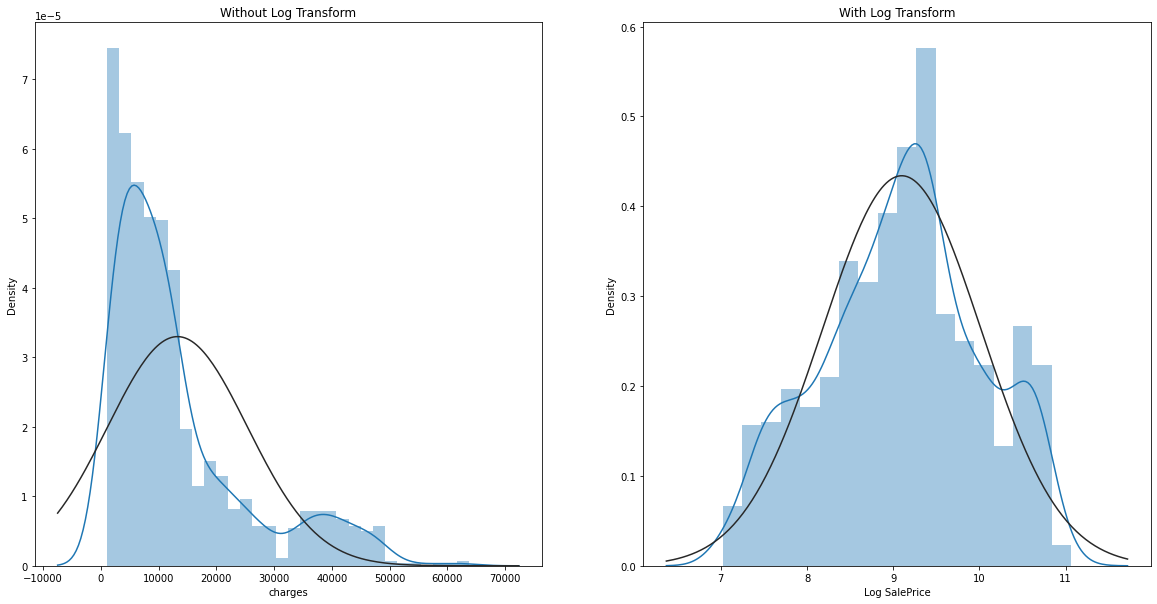

In [52]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [53]:
log_target = np.log(target)

# Split the data

In [54]:
data3.head(3)

,age,bmi,children,Overweight,Normal,Underweight,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-1.042346,0.475813,-0.455611,-0.106479,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,0.199594,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.441534,0.475813,-0.455611,-0.106479,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data3, target, test_size = 0.2, random_state = 0)

# Linear Regression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
regression.score(X_test,y_test)

0.7981706646693922

In [ ]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338,1)).astype(int), values = X, axis = 1)
SL = 0.05

In [ ]:
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     572.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:02:37   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5897.9719    496.857    -11.871      0.000   -6872.680   -4923.263
x1         -5897.9719    496.857    -11.871      0.000   -6872.680   -4923.263
x2           257.2656     11.894     21.629      0.000     233.932     280.599
x3          -131.2986    332.946     -0.394      0.693    -784.454     521.857
x4           330.8765     36.478      9.071      0.000     259.316     402.437
x5           479.6066    137.736      3.482      0.001     209.404     749.809
x6          2.382e+04    412.194     57.792      0.000     2.3e+04    2.46e+04
x7          -353.7467    151.991     -2.327      0.020    -651.914     -55.579
x8            40.6129    568.266      0.071      0.943   -1074.183    1155.409
==============================================================================
Omnibus:                      299.171   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.296
Skew:                           1.208   Prob(JB):                    7.81e-156
Kurtosis:                       5.642   Cond. No.                     6.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5,6]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     651.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          9.46e-312
Time:                        14:02:46   Log-Likelihood:                -13753.
No. Observations:                1338   AIC:                         2.752e+04
Df Residuals:                    1333   BIC:                         2.754e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1976.1777    508.273     -3.888      0.000   -2973.280    -979.075
x1         -1976.1777    508.273     -3.888      0.000   -2973.280    -979.075
x2          -308.5802    387.342     -0.797      0.426   -1068.446     451.286
x3           387.6727     31.675     12.239      0.000     325.534     449.811
x4           599.5993    160.088      3.745      0.000     285.548     913.651
x5          2.361e+04    479.335     49.254      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      159.206   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.941
Skew:                           0.827   Prob(JB):                     8.77e-55
Kurtosis:                       4.315   Cond. No.                     3.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Gradient Boosting Regresso

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 34, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [ ]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=34)

In [ ]:
clf.score(X_train,y_train)

0.9098381930328246

In [ ]:
clf_pred = clf.predict(X_test)

Text(0, 0.5, 'Predicted bY by Gradient Boosting Regressor')

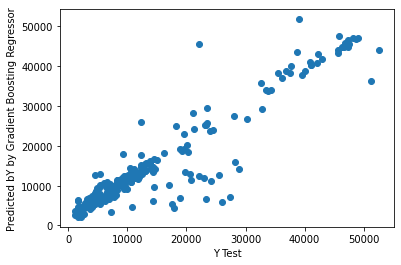

In [ ]:
plt.scatter(y_test,clf_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted bY by Gradient Boosting Regressor')

# Differents linear models

In [ ]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm


In [ ]:
OLS = LinearRegression()
OLS.fit(X_train, y_train)
OLS_yhat = OLS.predict(X_test)

In [ ]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

In [ ]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

In [ ]:
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [ ]:
from termcolor import colored as cl # text customization

In [ ]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [ ]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, OLS_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
Explained Variance Score of OLS model is 0.7984222714165612
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7983812367393386
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.798422005958904
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.7981651803176988
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.7979683200143111
-------------------------------------------------------------------------------


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=1000)
forest_fit = forest_reg.fit(X_train,y_train)
forest_pred = forest_fit.predict(X_test)

Text(0, 0.5, 'Predicted Y by Random Forest Regression')

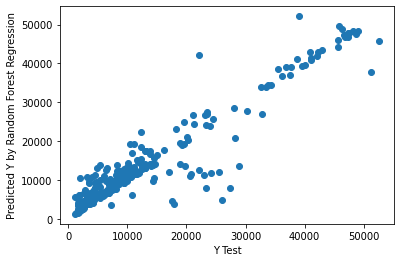

In [ ]:
plt.scatter(y_test,forest_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y by Random Forest Regression')

In [ ]:
forest_reg.score(X_test,y_test)

0.8763922375578008

# Testing

In [ ]:
df.head(3)

,age,sex,bmi,children,smoker,region,Overweight,Normal,Underweight,Charges
0,19,0,27.90,0,1,3,1,0,0,16884.9240
1,18,1,33.77,1,0,2,1,0,0,1725.5523
2,28,1,33.00,3,0,2,1,0,0,4449.4620


In [ ]:
inp = np.array([30,1,33,3,0,2,1,0,0])

In [ ]:
z = np.expand_dims(inp, axis=0)

In [ ]:
clf.predict(z)

array([6116.21338686])

In [ ]:
regression.predict(z)

array([7601.23122162])

In [ ]:
forest_reg.predict(z)

array([6366.78054612])

In [ ]:
mlp_reg.predict(z)

array([13201.18201038])